# RMSprop Optimizer Tutorial: Intuition and Implementation in Python

## Introduction

__Root-mean squared propagation__ (RMSprop) is a powerful optimization algorithm used in machine learning to find the model parameters that correspond to the best fit between actual values and model predictions. The algorithm is widely used in deep learning in combination with backpropagation during neural network training.

In this tutorial, you will learn:
- The intuition behind RMSprop optimizer
- How to use RMSprop in PyTorch
- How to implement it in pure NumPy for deeper understanding
- Its differences from other optimization algorithms such as SGD and Adam

## What is RMSprop? The Short Answer

RMSprop (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm designed to accelerate the convergence of gradient descent. Key features of RMSprop include:

1. Adaptive learning rates: It adjusts the learning rate for each parameter based on the historical gradient information.

2. Moving average of squared gradients: RMSprop maintains a moving average of squared gradients for each parameter, which helps to normalize the gradient updates.

3. Momentum-like behavior: By using the moving average, RMSprop achieves a momentum-like effect without explicitly incorporating momentum terms.

4. Improved performance on non-stationary problems: RMSprop is particularly effective for optimizing non-convex loss functions and handling non-stationary objectives.

5. Hyperparameter sensitivity reduction: Compared to standard SGD, RMSprop reduces the need for manual tuning of the learning rate hyperparameter.

In essence, RMSprop addresses the diminishing learning rates problem of AdaGrad while providing adaptive per-parameter learning rates, making it a popular choice for training deep neural networks.

## The Intuition Behind RMSprop Optimizer

It helps to think of optimization as finding the lowest point in a hilly terrain while being blindfolded. Since you are limited to your touch, you can find which way is down by only feeling the ground immediately around you. 

This analogy represents finding the best model parameters for the best fit between model predictions and actual values by optimizing a loss function. You can think of the surface of the loss function plotted on Cartesian coordinates as our hilly terrain. 

Different optimization functions like RMSprop provide different strategies for navigating this terrain. A key aspect of RMSprop's strategy is adaptive movement based on the recent history of the terrain. 

Specifically, it allows you to adjust your step size (stride length) for each direction you can move. In flat directions, you can take larger steps for acceleration while in steep areas, take careful small steps to prevent overshooting over sharp declines. Also, in rapidly changing terrain like rocky surfaces, it balances out your path, preventing erratic movements. 

Due to its characteristics, RMSprop's strategy is particularly effective for optimizing non-convex functions. In other words, RMSprop is specifically designed for optimization problems where the graph of the function can have multiple local minima, maxima or saddle points. Visually, a non-convex function would have multiple valleys, hills, small dips and rocky surfaces, rather than a single, smooth bowl-shape (which would be convex).

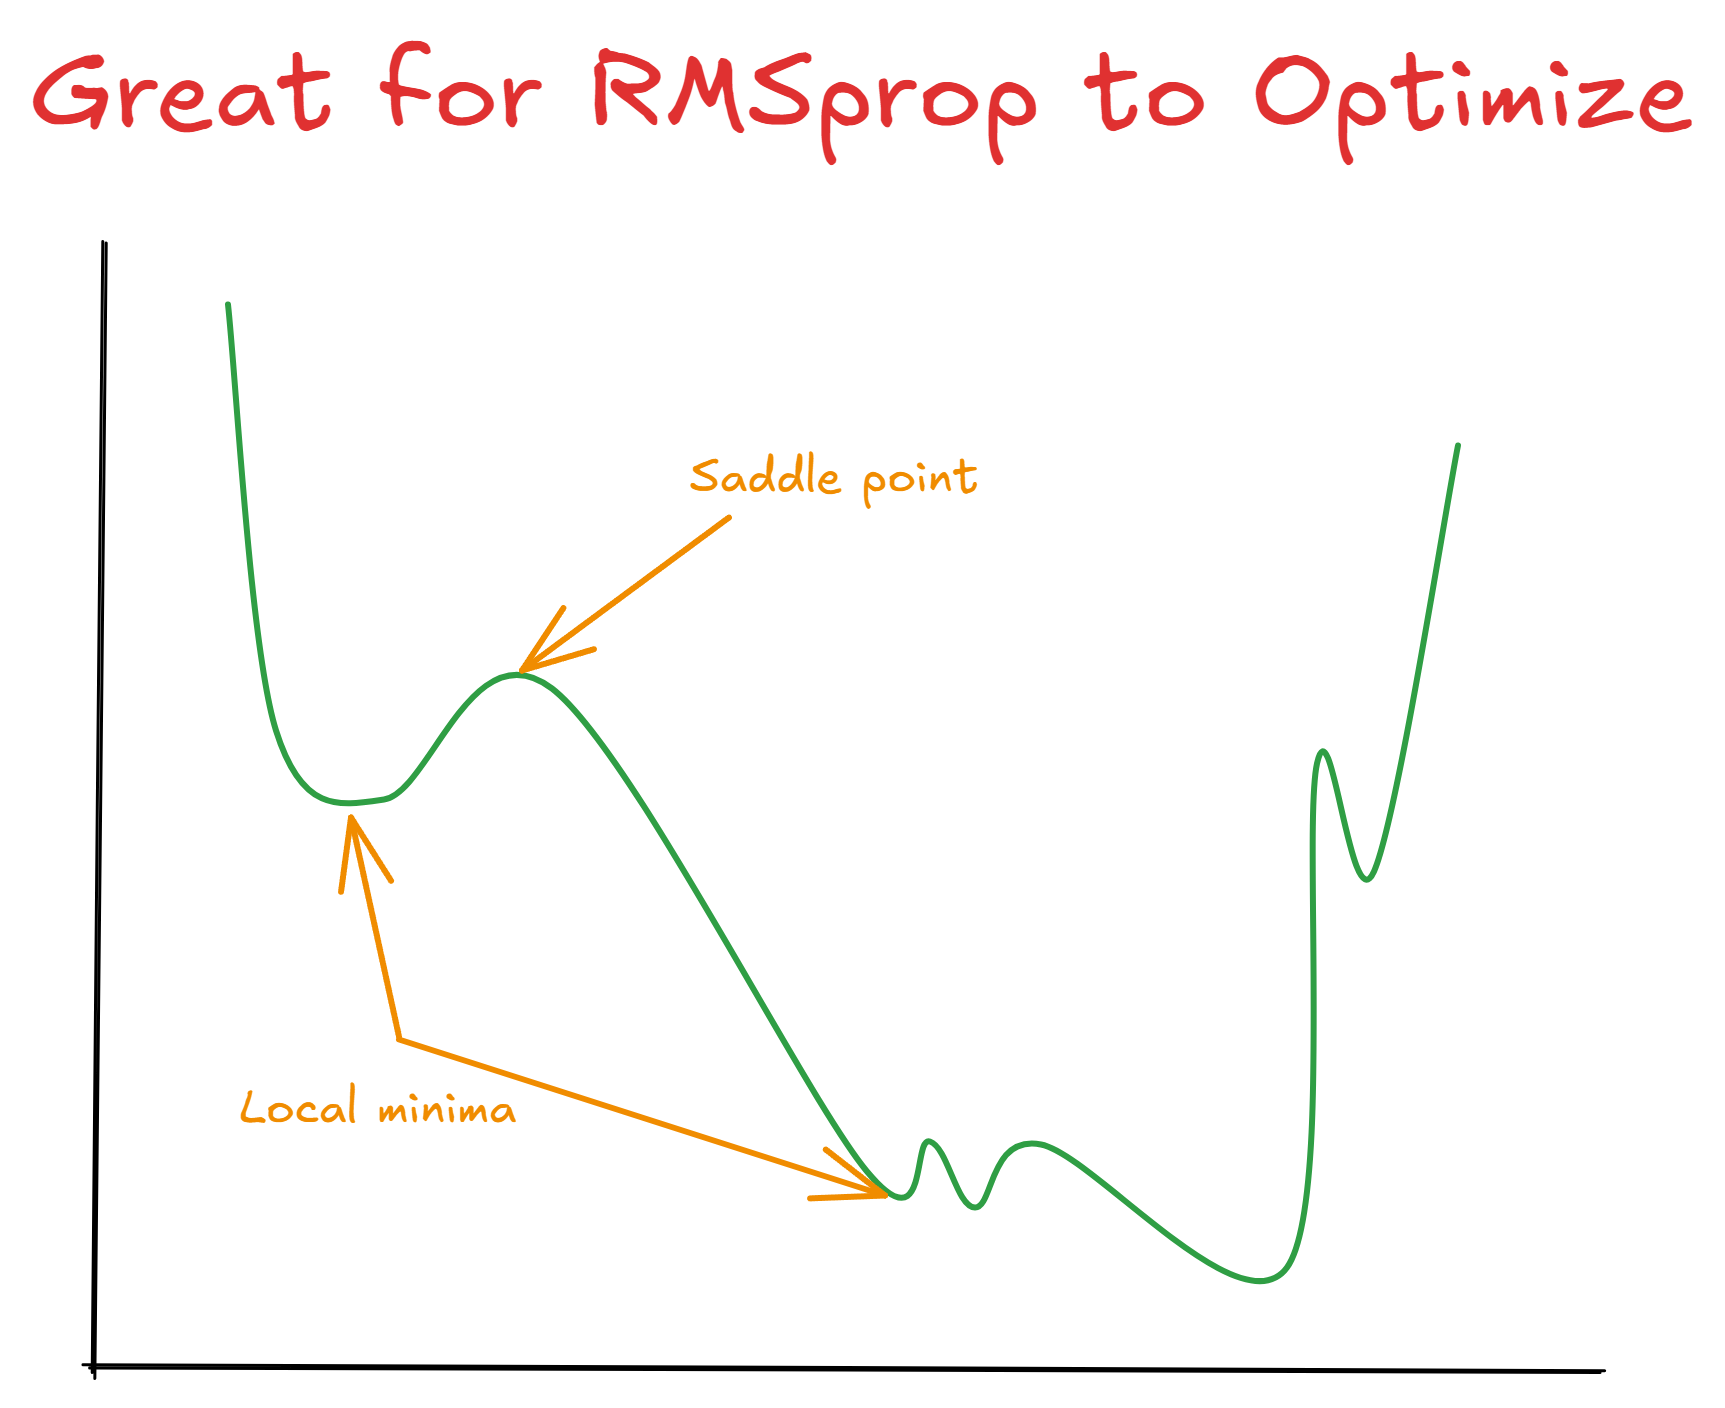

## Using RMSprop in PyTorch and TensorFlow

In practice, you rarely have to implement RMSprop manually. Since it is a widely used algorithm, it is available in popular frameworks such as PyTorch and Tensorflow. 

### RMSprop in PyTorch

In PyTorch, the algorithm is implemented under the `optim` module:

In [17]:
import torch

torch.optim.RMSprop

torch.optim.rmsprop.RMSprop

Here is how you can use it to optimize (find the minimum) of any function `f(x)`:

In [18]:
import torch.optim as optim

# Define the loss function: f(x) = x / log(x)
def f(x):
    return x / torch.log(x)

# Create a tensor with requires_grad=True
x = torch.tensor([364.0], requires_grad=True)

# Create an RMSprop optimizer
optimizer = optim.RMSprop([x], lr=0.3)

# Optimization loop
for i in range(1500):
    # Forward pass: compute the loss
    loss = f(x)
    
    # Backward pass: compute the gradients
    loss.backward()
    
    # Update the parameter
    optimizer.step()
    
    # Zero the gradients
    optimizer.zero_grad()
    
    if i % 100 == 0:
        print(f'Iteration {i}: x = {x.item():.4f}')

print(f'Final result: x = {x.item():.4f}')

Iteration 0: x = 361.0000
Iteration 100: x = 302.5840
Iteration 200: x = 268.0156
Iteration 300: x = 236.2579
Iteration 400: x = 205.2928
Iteration 500: x = 174.5349
Iteration 600: x = 143.7643
Iteration 700: x = 112.8619
Iteration 800: x = 81.7036
Iteration 900: x = 50.0471
Iteration 1000: x = 17.0591
Iteration 1100: x = 2.7183
Iteration 1200: x = 2.7183
Iteration 1300: x = 2.7183
Iteration 1400: x = 2.7183
Final result: x = 2.7183


In this case, we are optimizing `x / log(x)` function which has a minimum at _e_. When we are initializing the `RMSprop` class, we are giving it an arbitrary start value, 364. After about 1100 iterations, the minimum is correctly found.

Here is the explanation of the code:

1. Function definition:

```python
def f(x):
    return x / torch.log(x)
```

2. Initialization:

```python
x = torch.tensor([364.0], requires_grad=True)
```

Creates a PyTorch tensor with an initial value of 364.0. `requires_grad=True` allows PyTorch to compute gradients for this tensor.

3. Optimizer setup:

```python
optimizer = optim.RMSprop([x], lr=0.3)
```

4. Optimization loop:
```python
for i in range(1500):
```

Runs the optimization process for 1500 iterations.

5. Inside the loop:
- `loss = f(x)`: Computes the current value of the function.
- `loss.backward()`: Computes the gradient of the loss with respect to `x`.
- `optimizer.step()`: Updates `x` using the RMSprop algorithm.
- `optimizer.zero_grad()`: Resets the gradients to zero for the next iteration.

6. Progress tracking:

```python
    if i % 100 == 0:
        print(f'Iteration {i}: x = {x.item():.4f}')
```

7. Final result:

```python
print(f'Final result: x = {x.item():.4f}')
```

To use `RMSprop` in supervised learning problems, you can refer to our [Introduction to PyTorch course](https://www.datacamp.com/courses/introduction-to-deep-learning-with-pytorch).

### RMSprop in Tensorflow and Keras

Let's see how to optimize the same function with RMSprop in Tensorflow and Keras:

In [24]:
import tensorflow as tf

# Define the loss function: f(x) = x / log(x)
def f(x):
    return x / tf.math.log(x)

# Create a variable
x = tf.Variable([364.0])

# Create an RMSprop optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.3)

# Optimization loop
for i in range(1500):
    with tf.GradientTape() as tape:
        loss = f(x)
    
    # Compute gradients
    gradients = tape.gradient(loss, [x])
    
    # Apply gradients
    optimizer.apply_gradients(zip(gradients, [x]))
    
    if i % 100 == 0:
        print(f'Iteration {i}: x = {x.numpy()[0]:.4f}')

print(f'Final result: x = {x.numpy()[0]:.4f}')

Iteration 0: x = 363.0513
Iteration 100: x = 330.9281
Iteration 200: x = 300.8935
Iteration 300: x = 270.8544
Iteration 400: x = 240.8105
Iteration 500: x = 210.7600
Iteration 600: x = 180.7007
Iteration 700: x = 150.6295
Iteration 800: x = 120.5406
Iteration 900: x = 90.4234
Iteration 1000: x = 60.2539
Iteration 1100: x = 29.9579
Iteration 1200: x = 2.7183
Iteration 1300: x = 2.7183
Iteration 1400: x = 2.7183
Final result: x = 2.7183


This time, the optimizer class is located at `tf.keras.optimizers` module. As you can see, the algorithm correctly converged at _e_ just like PyTorch but took slightly more iterations.

Here is an explanation of the code:

1. Variable initialization:

```python
x = tf.Variable([364.0])
```

2. Optimizer setup:

```python
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.3)
```

3. Optimization loop:

```python
for i in range(1500):
```

4. Inside the loop:
```python
with tf.GradientTape() as tape:
    loss = f(x)
```

Uses TensorFlow's GradientTape to record operations for automatic differentiation.

5. Gradient computation:

```python
gradients = tape.gradient(loss, [x])
```

6. Gradient application:

```python
optimizer.apply_gradients(zip(gradients, [x]))
```

Updates x using the computed gradients and the RMSprop algorithm.

## Implementing RMSprop in Python Step-by-Step

Your interactions with RMSprop will be mostly limited to those classes in either TensorFlow or PyTorch in practice. However, a deep understanding of their implementation and hyperparameters will go a long way in solidifying your ability to fine-tune them for various problems. Therefore, in this section, we will create a function, `rmsprop`, step-by-step that will output the best model parameters given `x` and `y` arrays.

### 1. Defining the model and loss function

Our implementation of RMSprop will be designed to find the best parameters to a Simple Linear Regression model - `f(x) = mx + b`. Here:
- `m` is the slope
- `b` is the intercept
- `x` is the input
- `f(x)` is the model prediction given the input and parameters. 

Let's define the model as a function:

In [2]:
import numpy as np


def model(m, x, b):
    """Simple linear regression model with slope m and intercept b"""
    return m * x + b

For regression problems, Mean Squared Error is commonly used as a loss function:

In [3]:
def mean_squared_error(y_true, y_pred):
    """Mean squared error loss function"""
    return np.mean((y_true - y_pred) ** 2)

![](https://lh7-rt.googleusercontent.com/docsz/AD_4nXdJLQE2nSYUxoP57elPCyJqvpEHrLTxS-QoMm9D8mGdIOF3MXtGt3obCy4aPvSBwlGK7cWhw3l6epGPL7kyvTUeDZp8gHB-F1JbSnBfIeorJeZ2NhZoNzJDb15uup53_62Yo2u_kh63_ZMrcBQwV49aa314?key=ze7yjVtCPt0QLwUc8HrGHQ)

### 2. Defining the optimization algorithm function

Now, we define a function named `rmsprop` that accepts seven parameters:

```python
def rmsprop(
    x,
    y,
    initial_params,
    learning_rate=0.001,
    decay_rate=0.9,
    epsilon=1e-8,
    n_iter=1000,
):
    pass
```

Here are the explanations of the parameters:
- `x`: Input features
- `y`: Target values
- `initial_params`: Starting values for the model parameters (slope and intercept)
- `learn_rate`: Step size for parameter updates (default: 0.001)
- `decay_rate`: Decay factor for moving average of squared gradients (default: 0.9)
- `epsilon`: Small value to prevent division by zero (default: 1e-8)
- `n_iter`: Number of iterations for optimization (default: 1000)

Don't worry too much about the hyperparameters. We will explain them in detail later on.

### 3. Initialize an empty array for squared gradients

Inside the function body, we will create an empty array to store the squared gradients:

```python
def rmsprop(...):
    params = np.array(initial_params, dtype=float)  # Use float
    squared_grad = np.zeros_like(params)
```

`params` will be an array containing random start values like `[0, 1]`. `squared_grad` will look the same:

In [4]:
params = np.array([0, 1])
squared_grad = np.zeros_like(params)

print(squared_grad)

[0 0]


### 4. Writing the optimization loop

In the next step, we start an optimization loop. A single iteration of the loop represents a single pass through the entire dataset, `x`. The number of iterations depends on the given initial parameters and the complexity of the problem we are solving. In the TensorFlow and PyTorch section, we have seen that we needed at least 1100 iterations for the algorithm to converge. The same logic applies here:

```python
def rmsprop(...):
    params = ...
    squared_grad = ...

    for _ in range(n_iter):
        # Forward pass
        y_pred = model(params[0], x, params[1])

        # Compute error
        error = y_pred - y
```

The first step in the loop is performing a forward pass, or in other words, computing predictions with the current set of parameters and then, the error. You might be wondering why we are using `y_pred - y` as error instead of using the `mean_squared_error` function we defined above. You will find the explanation of this step in a later section. 

### 5. Computing the gradients


Once we have the error, we can compute the gradients for both parameters:

```python
def rmsprop(...):
    params = ...
    squared_grad = ...

    for _ in range(n_iter):
        # Forward pass
        y_pred = model(params[0], x, params[1])

        # Compute error
        error = y_pred - y

        # Compute gradients
        grad_m = np.mean(error * x)
        grad_b = np.mean(error)
        grad = np.array([grad_m, grad_b])
```

The formula for computing `grad_m` and `grad_b` comes from the partial derivatives of Mean Squared Error. Again, we will see the explanation of the formula in a later section. For now, think of each gradient as how much MSE changes when we slightly adjust `m` and `b`. 

### 6. Writing RMSprop's update rule

We now have the gradients that show us in which direction we should adjust the parameters. This is where we use all of `learning_rate`, `decay_rate`, and `epsilon` parameters in a single operation known as RMSprop's update rule. 

This is where the algorithm is distinguished from other optimization processes. This is where RMSprop adjusts learning rates for each of our parameters `m` and `b` based on the history of the terrain stored in `squared_grad` array:

```python
def rmsprop(...):
    params = ...
    squared_grad = ...

    for _ in range(n_iter):
        # Forward pass
        ...

        # Compute error
        ...

        # Compute gradients
        ...

        # RMSprop update rule
        squared_grad = decay_rate * squared_grad + (1 - decay_rate) * grad ** 2
        params -= learn_rate * grad / (np.sqrt(squared_grad) + epsilon)
```

The update is carried out in two steps:
- Updating the history of squared gradients using `decay_rate` and the gradients
- Updating the parameters based on the updated squared gradients

Both steps requires some math we need to go over, but again, we will keep that to a later section so that we don't get distracted. For now, all you need to know is that each RMSprop update changes the parameters in a way that conforms to the overall optimization strategy we discussed ealier. 

Once the optimization loop ends, we return the tuned parameters:

```python
def rmsprop(...):
    params = ...
    squared_grad = ...

    for _ in range(n_iter):
        # Forward pass
        ...

        # Compute error
        ...

        # Compute gradients
        ...

        # RMSprop update rule
        ...
    return params
```

Here is the full function so far:

In [8]:
def rmsprop(
    x, y, initial_params, learn_rate=0.001, decay_rate=0.9, epsilon=1e-8, n_iter=10000
):
    params = np.array(initial_params, dtype=float)
    squared_grad = np.zeros_like(params)

    for _ in range(n_iter):
        # Forward pass
        y_pred = model(params[0], x, params[1])

        # Compute error
        error = y_pred - y

        # Compute gradients
        grad_m = np.mean(error * x)
        grad_b = np.mean(error)
        grad = np.array([grad_m, grad_b])

        # RMSprop update
        squared_grad = decay_rate * squared_grad + (1 - decay_rate) * grad**2
        params -= learn_rate * grad / (np.sqrt(squared_grad) + epsilon)

    return params

Let's use it on a small sample dataset with just six values:

In [19]:
# Example usage
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

initial_params = np.array([3.0, 5.0])  # Change: Use float values
result = rmsprop(x, y, initial_params, n_iter=5000)
print("Optimized parameters (m, b):", result)

# Make predictions
y_pred = model(result[0], x, result[1])
print("Predictions:", y_pred)
print("Actual values:", y)
print("Root Mean Squared Error", mean_squared_error(y, y_pred) ** 0.5)

Optimized parameters (m, b): [0.54935276 5.24240429]
Predictions: [ 7.98916807 13.48269564 18.97622321 24.46975078 29.96327835 35.45680592]
Actual values: [ 5 20 14 32 22 38]
Root Mean Squared Error 5.813195776655382


The predictions using the found parameters are reasonably close to actual values. We can confirm this by plotting the regression line:

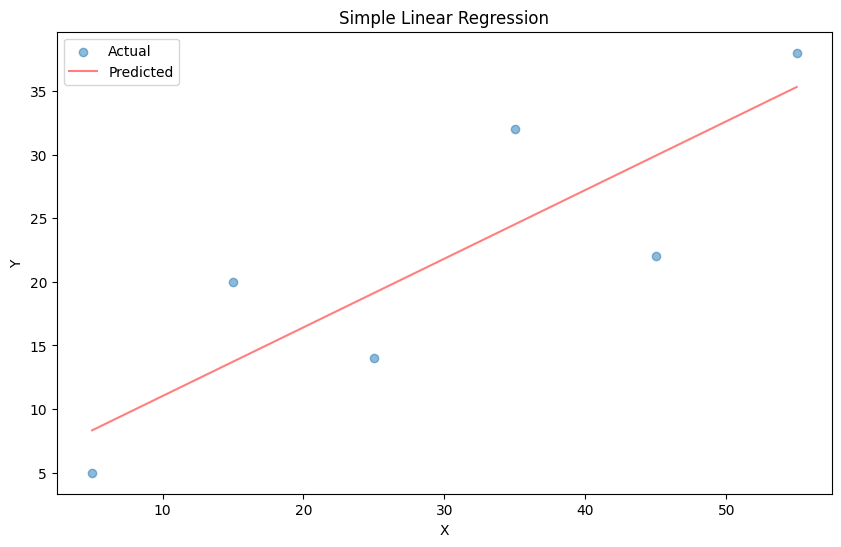

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label="Actual")
plt.plot(x, y_pred, alpha=0.5, label="Predicted", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

It is the line of best fit!

## Adding Mini-batches to RMSprop

The `rmsprop` function is a bare-bones implementation of our algorithm. In a practical version, RMSprop would have a few differences.

The most important one is mini-batches. In our version, each parameter update uses the entire dataset, regardless of whether it has 10 data points or 10 million:

```python
    ...
    for _ in range(n_iter):
        # Forward pass
        y_pred = model(params[0], x, params[1])  # <-- This is using the entire dataset

        # Compute error
        error = y_pred - y

        # Compute gradients
        grad_m = np.mean(error * x)
        grad_b = np.mean(error)
        grad = np.array([grad_m, grad_b])
    ...
```

In practice, this can become a huge bottleneck for large datasets. For this reason, we introduce mini-batches to the algorithm using the `batch_size` hyperparameter. Here is how it affects the process:

1. The optimization loop starts.
2. In each iteration, the dataset is shuffled to prevent learning order-dependent patterns.
3. The dataset is divided into groups of data points whose lengths are equal to `batch_size`. For example, if the dataset size is 640 and batch size is 32, 20 batches will be created in total.
4. Error, gradient computation and parameter updates will be performed for each batch. 

Let's see how this version looks like in code:

```python
def rmsprop(
    x,
    y,
    initial_params,
    learning_rate=0.01,
    decay_rate=0.9,
    epsilon=1e-8,
    n_iter=1000,
    batch_size=32,
):
    params = np.array(initial_params, dtype=float)
    squared_grad = np.zeros_like(params)
    n_samples = len(x)
```

What's new in this snippet:
- We introduce the new `batch_size` parameter
- We store the dataset length in `n_samples`

Then, we start the optimization loop:

```python
def rmsprop(...):
    ...

    for _ in range(n_iter):
        indices = np.random.permutation(n_samples)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
```

What's new in this snippet:
- We shuffle the data using `np.random.permutation`


Next, we start another loop:

```python
def rmsprop(...):
    ...

    for _ in range(n_iter):
        ...

        for i in range(0, n_samples, batch_size):
            x_batch = x_shuffled[i : i + batch_size]
            y_batch = y_shuffled[i : i + batch_size]
```

What's new in this snippet:
- We start a loop that divides the dataset into multiple groups of `batch_size` samples
- In each iteration, we extract the current X and Y arrays from the current batch

The rest will be familiar:

```python
def rmsprop(...):
    ...

    for _ in range(n_iter):
        ...

        for i in range(0, n_samples, batch_size):
            x_batch = ...
            y_batch = ...

            y_pred = params[0] * x_batch + params[1]
            error = y_pred - y_batch
            grad_m = np.mean(error * x_batch)
            grad_b = np.mean(error)
            grad = np.array([grad_m, grad_b])

            squared_grad = decay_rate * squared_grad + (1 - decay_rate) * grad**2
            params -= learning_rate * grad / (np.sqrt(squared_grad) + epsilon)

    return params
```

What's new in this snippet:
- The error is calculated for the current batch
- The gradients are also calculated for the current batch using `x_batch`

Here is the full function so far:

In [20]:
def rmsprop(
    x,
    y,
    initial_params,
    learning_rate=0.01,
    decay_rate=0.9,
    epsilon=1e-8,
    n_iter=1000,
    batch_size=32,
):
    params = np.array(initial_params, dtype=float)
    squared_grad = np.zeros_like(params)
    n_samples = len(x)

    for _ in range(n_iter):
        indices = np.random.permutation(n_samples)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for i in range(0, n_samples, batch_size):
            x_batch = x_shuffled[i : i + batch_size]
            y_batch = y_shuffled[i : i + batch_size]

            y_pred = params[0] * x_batch + params[1]
            error = y_pred - y_batch
            grad_m = np.mean(error * x_batch)
            grad_b = np.mean(error)
            grad = np.array([grad_m, grad_b])

            squared_grad = decay_rate * squared_grad + (1 - decay_rate) * grad**2
            params -= learning_rate * grad / (np.sqrt(squared_grad) + epsilon)

    return params

Let's test it on an actual dataset:

In [21]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Extract carat and price
X = diamonds["carat"].values.reshape(-1, 1)
y = diamonds["price"].values

# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y_normalized, test_size=0.2, random_state=42
)

Here is what we are doing in the above snippet:
- Loading the Diamonds dataset from Seaborn
- Choosing its `carat` feature to predict diamond `price`s and storing the arrays as `X` and `y`
- Normalizing the arrays since Linear Regression requires features in similar scales
- Splitting the data into training and test sets

Now, let's use our `rmsprop` function on the dataset:

In [24]:
# Train the model using RMSprop
initial_params = np.array([1.0, 0.0])

optimized_params = rmsprop(
    X_train.flatten(),
    y_train,
    initial_params,
    learning_rate=0.01,
    n_iter=5000,
    batch_size=512,
)

Diamonds dataset has over 50k samples, so we are choosing a batch size of 512. Let's make predictions with the tuned parameters and calculate the loss on the test set:

In [25]:
# Make predictions on the test set
y_pred_normalized = model(optimized_params[0], X_test.flatten(), optimized_params[1])

# Denormalize the predictions
y_pred = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1)).flatten()
y_test_denormalized = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_denormalized, y_pred)
print(f"Root Mean Squared Error: {mse ** 0.5:.2f}")

# Print optimized parameters
print(f"Optimized slope (m): {optimized_params[0]:.4f}")
print(f"Optimized intercept (b): {optimized_params[1]:.4f}")

Root Mean Squared Error: 1550.76
Optimized slope (m): 0.9269
Optimized intercept (b): 0.0089


The RMSE score is $1550. Let's plot the regression line:

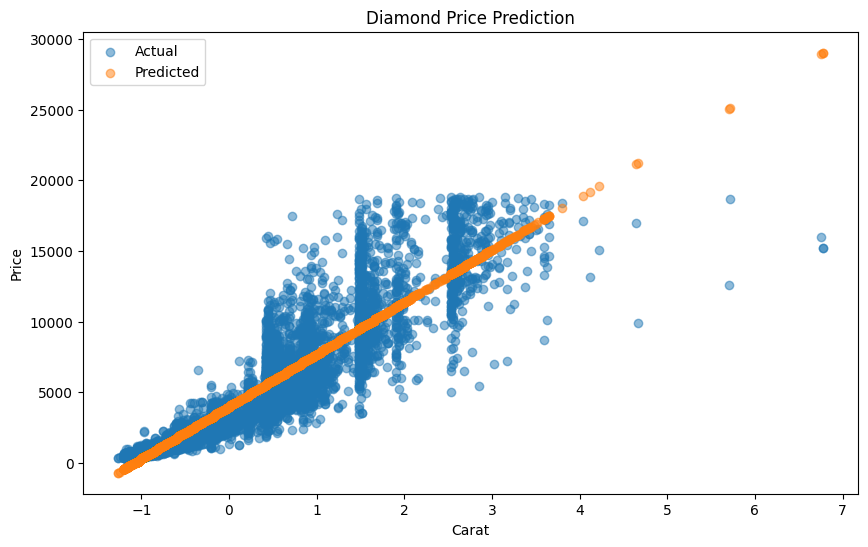

In [26]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test_denormalized, alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred, alpha=0.5, label="Predicted")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamond Price Prediction")
plt.legend()
plt.show()

Again, we see that the line fits the data well.

In summary, using mini-batches in RMSprop offers several interconnected benefits. By processing smaller batches, it improves computational efficiency, requiring less memory and potentially speeding up calculations. This approach introduces beneficial noise that aids in generalization and helps prevent overfitting. The more frequent parameter updates enabled by mini-batches can lead to faster convergence, while also allowing for training on large datasets that might not fit entirely in memory. Additionally, the stochastic nature of mini-batch selection enhances the algorithm's ability to escape local minima, increasing the likelihood of finding better global solutions.

## The Gradient of Mean Squared Error

To understand how RMSprop updates the model parameters, we need to first understand the gradient of the mean squared error (MSE) loss function. The gradient tells us how to adjust our parameters to minimize the error.

For our simple linear regression model `f(x) = mx + b`, the mean squared error is:

```latex
MSE = (1/n) * Σ(y_i - (m * x_i + b))^2
```

Where:
- `n` is the number of samples
- `y_i` is the actual value
- `m * x_i + b` is the predicted value


To find the gradients, we need to calculate the partial derivatives of MSE with respect to `m` and `b`:

1. Gradient with respect to `m` (∂MSE/∂m):
   ```latex
   ∂MSE/∂m = (-2/n) * Σ(y_i - (m * x_i + b)) * x_i
   ```

2. Gradient with respect to `b` (∂MSE/∂b):
   ```latex
   ∂MSE/∂b = (-2/n) * Σ(y_i - (m * x_i + b))
   ```

Let's break down these formulas:

1. For the slope `m`:
   - We sum the product of the error `(y_i - (mx_i + b))` and the input `x_i` for each sample.
   - This is multiplied by `-2/n` to get the average gradient.

2. For the intercept `b`:
   - We sum the error `(y_i - (mx_i + b))` for each sample.
   - This is also multiplied by `-2/n` to get the average gradient.

In our implementation, we simplified these formulas slightly:

```python
error = y_pred - y
grad_m = np.mean(error x)
grad_b = np.mean(error)
```


Here's how this simplification works:

1. We calculate the error as `(y_pred - y)` instead of `(y - y_pred)`. This flips the sign, eliminating the need for the negative sign in our gradient formulas.

2. We use `np.mean()` instead of summing and dividing by `n`, which gives us the average directly.

3. For `grad_m`, we multiply the error by `x` before taking the mean, which is equivalent to the formula above.

4. For `grad_b`, we just take the mean of the error, which is equivalent to the formula above (since `x_i ^ 0 = 1` for all `i`).

These gradients tell us how to adjust `m` and `b` to reduce the error. A positive gradient means we should decrease the parameter, while a negative gradient means we should increase it. The magnitude of the gradient indicates how large this adjustment should be.

RMSprop uses these gradients in its update rule, but it doesn't apply them directly. Instead, it uses them to compute adaptive learning rates for each parameter, which we'll explore in the next section.

## Intuition Behind RMSprop's Update Rule

## RMSprop vs. SGD vs. Adam

## Conclusion